# Exploring NSL-KDD dataset

In [1]:
# module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC

# processing imports
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import f1_score, precision_score, recall_score


%matplotlib inline
import warnings
warnings.simplefilter("ignore")

# Data extraction

In [2]:
df_train = pd.read_csv("KDDTrain+.txt")

In [3]:
# add the column labels
columns = (['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
            'urgent', 'hot' ,'num_failed_logins', 'logged_in', 'num_compromised','root_shell','su_attempted','num_root',
            'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
            'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
            'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
            'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
            'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

df_train.columns = columns

df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
df_train["attack"].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [5]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [7]:
# to get the unique protocols and their value count

protocol_value = list(df_train.protocol_type.value_counts().values)
protocol = list(df_train.protocol_type.value_counts().index)

pd.DataFrame({'protocol':protocol, 'protocol_value':protocol_value,})

protocol_df = pd.DataFrame(data=zip(protocol, protocol_value),
            columns = ["Protocol", "Count",])

  Protocol   Count
0      tcp  102688
1      udp   14993
2     icmp    8291


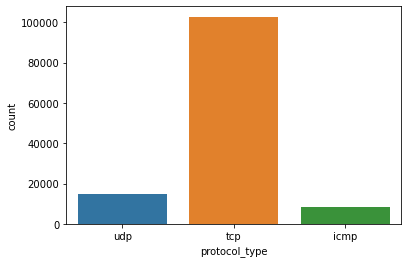

In [8]:
print(protocol_df)
sns.countplot(x="protocol_type", data=df_train);

SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64


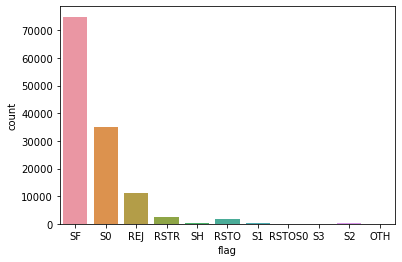

In [9]:
print(df_train["flag"].value_counts())
sns.countplot(x="flag", data=df_train);

In [10]:
str(list(set(df_train.attack)))

"['portsweep', 'rootkit', 'guess_passwd', 'teardrop', 'perl', 'land', 'satan', 'ftp_write', 'spy', 'loadmodule', 'neptune', 'smurf', 'normal', 'buffer_overflow', 'warezmaster', 'back', 'multihop', 'warezclient', 'nmap', 'phf', 'ipsweep', 'pod', 'imap']"

# Data transformations
The first transformations will be done on the attack field. A new column will be added that encodes 'normal' values as 0 and any other value as 1.

#### Binary Classication of Attack
>- normal = 0
>- others/attack = 1

In [11]:
# map normal to 0, all attacks to 1
train_attack = df_train.attack.map(lambda a: 0 if a == 'normal' else 1)

df_train['attack_norm'] = train_attack

df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_norm
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


0    67342
1    58630
Name: attack_norm, dtype: int64


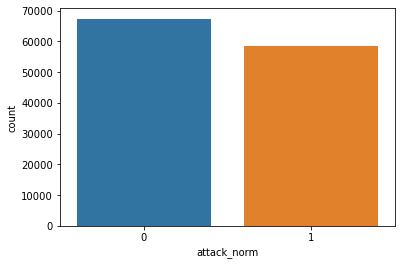

In [12]:
print(df_train["attack_norm"].value_counts())
sns.countplot(x="attack_norm", data=df_train);

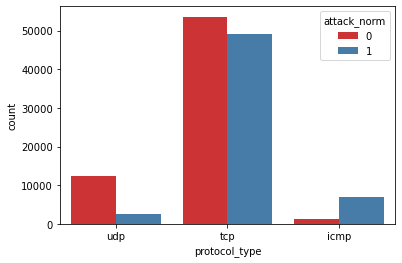

In [13]:
# protocl type vs binary attack 
sns.countplot(x='protocol_type',hue='attack_norm' , data = df_train , palette ='Set1');

<AxesSubplot:>

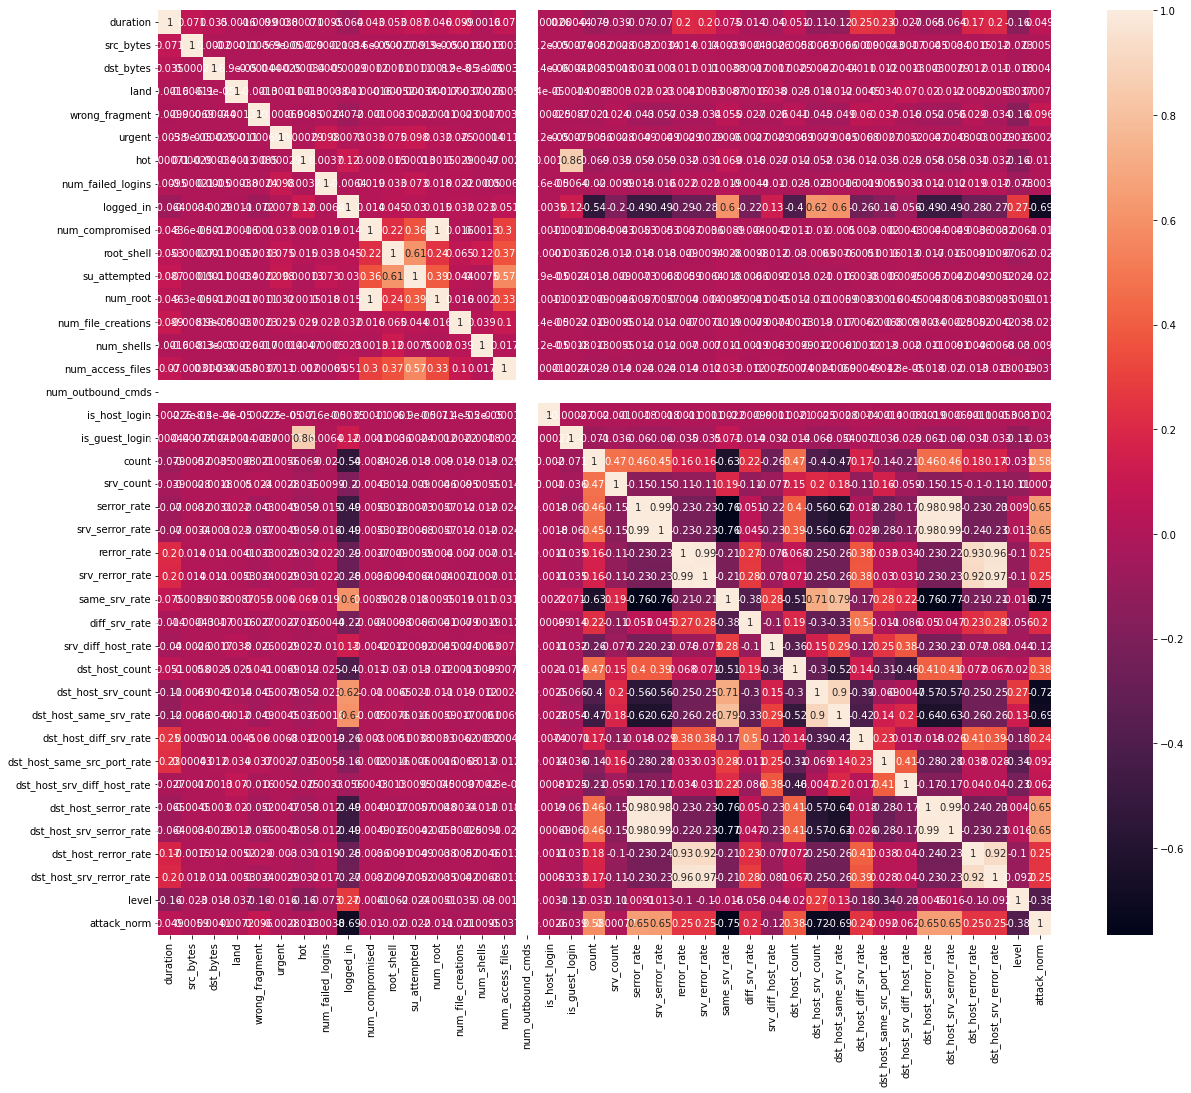

In [14]:
# correlation matrix
plt.figure(figsize=(20,17))
sns.heatmap(df_train.corr(), annot= True)

#### Multi Classication of Attack
>- Normal = 0
>- DoS = 1
>- Probe = 2
>- Privilege = 3
>- Access = 4

In [15]:
# lists to hold our attack classifications
dos_attacks = ['back','land','neptune','pod','smurf','teardrop']
probe_attacks = ['ipsweep','nmap','portsweep','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','rootkit',]
access_attacks = ['ftp_write','guess_passwd','imap','multihop','phf','spy','warezclient','warezmaster']

attack_labels = ['Normal','DoS','Probe','Privilege','Access']

In [16]:
def map_attack(attack):
    if attack in dos_attacks:
        attack_type = 1
    elif attack in probe_attacks:
        attack_type = 2
    elif attack in privilege_attacks:
        attack_type = 3
    elif attack in access_attacks:
        attack_type = 4
    else:
        attack_type = 0
        
    return attack_type

train_attack_map = df_train.attack.apply(map_attack)
df_train['attack_map'] = train_attack_map

In [17]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_norm,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


In [18]:
set(df_train.attack_map)

{0, 1, 2, 3, 4}

0    67351
1    45927
2    11656
4      995
3       43
Name: attack_map, dtype: int64


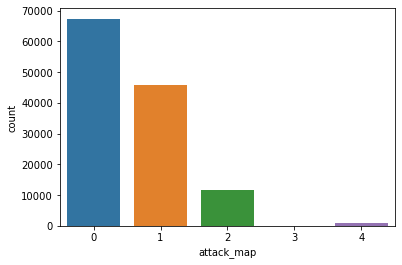

In [19]:
print(df_train.attack_map.value_counts());
sns.countplot(x="attack_map", data=df_train);

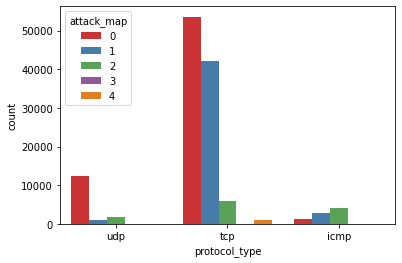

In [20]:
# protocl type vs binary attack 
sns.countplot(x='protocol_type',hue='attack_map' , data = df_train , palette ='Set1');

# Feature engineering

In [21]:
# to decode the non_numeric columns to numbers. will be making use of dummies

non_numeric_features = ["protocol_type", "service", "flag"]
train_encoded = pd.get_dummies(df_train[non_numeric_features])

# adding the left over columns
numeric_features = list(df_train.columns.drop(["protocol_type","service", "flag", "attack","attack_norm","attack_map"]))

# model to fit/test
train_set = train_encoded.join(df_train[numeric_features])

In [22]:
# the models
models = [RandomForestClassifier(),
    LogisticRegression(max_iter=250),
    KNeighborsClassifier(),
         svm.LinearSVC()]

### Single_Classification of Attack

In [23]:
bin_y = df_train['attack_norm']

bin_X_train, bin_X_test, bin_y_train, bin_y_test = train_test_split(train_set, bin_y, test_size=0.3)



The Metrics for RandomForestClassifier is: 

Accuracy: 1.0

Mean absolute error: 0.0004 
Mean squared error: 0.0004 
Root mean squared: 0.02 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20123
           1       1.00      1.00      1.00     17669

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792

[[20117     6]
 [    8 17661]]


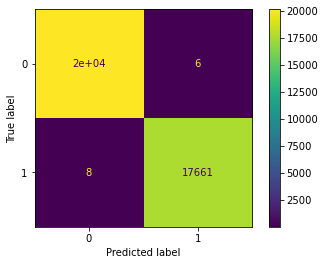

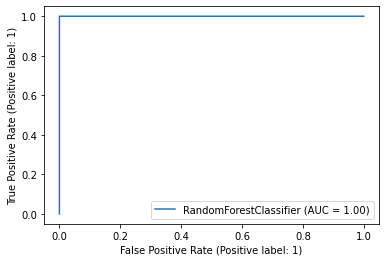

AUC  = 1.0


The Metrics for LogisticRegression is: 

Accuracy: 0.88

Mean absolute error: 0.1204 
Mean squared error: 0.1204 
Root mean squared: 0.347 

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     20123
           1       0.88      0.86      0.87     17669

    accuracy                           0.88     37792
   macro avg       0.88      0.88      0.88     37792
weighted avg       0.88      0.88      0.88     37792

[[17972  2151]
 [ 2401 15268]]


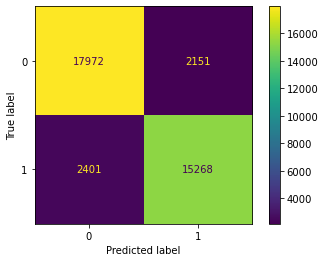

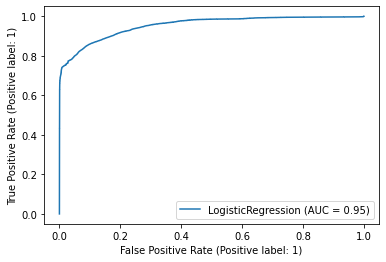

AUC  = 0.879


The Metrics for KNeighborsClassifier is: 

Accuracy: 0.995

Mean absolute error: 0.0049 
Mean squared error: 0.0049 
Root mean squared: 0.07 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     20123
           1       0.99      1.00      0.99     17669

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792

[[20010   113]
 [   71 17598]]


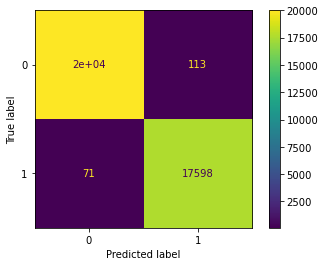

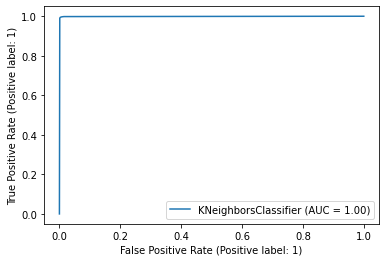

AUC  = 0.995


The Metrics for LinearSVC is: 

Accuracy: 0.949

Mean absolute error: 0.0509 
Mean squared error: 0.0509 
Root mean squared: 0.2256 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     20123
           1       0.99      0.90      0.94     17669

    accuracy                           0.95     37792
   macro avg       0.95      0.95      0.95     37792
weighted avg       0.95      0.95      0.95     37792

[[19976   147]
 [ 1778 15891]]


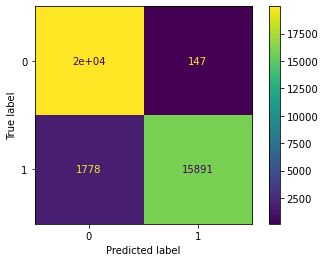

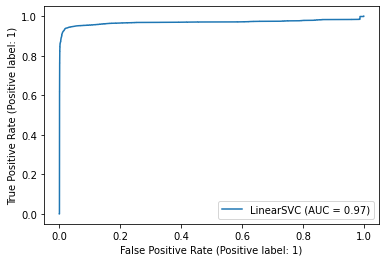

AUC  = 0.946


In [24]:
bin_class_acc = []
bin_auc = []
bin_model = []
bin_mae = []
bin_mse = []
bin_rmse = []
bin_f1 = []
bin_recall = []
bin_prec = []
sensitivity = []
specificity = []

for model in models:
    model_name = model.__class__.__name__
    model.fit(bin_X_train, bin_y_train)
    model_pred = model.predict(bin_X_test)
    
    bin_acc = np.round(accuracy_score(model_pred, bin_y_test), 3)
    confusion_matrix = metrics.confusion_matrix(bin_y_test, model_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_ )
    auc = np.round(roc_auc_score(bin_y_test,model_pred), 3)
    mae = np.round(mean_absolute_error(bin_y_test, model_pred), 4)
    mse = np.round(mean_squared_error(bin_y_test, model_pred), 4)
    rmse = np.round(np.sqrt(mse), 4)
    f1_score = np.round(metrics.f1_score(bin_y_test, model_pred), 4)
    recall = np.round(metrics.recall_score(bin_y_test, model_pred), 4)
    precision = np.round(metrics.precision_score(bin_y_test, model_pred), 4)
    cm = metrics.confusion_matrix(bin_y_test, model_pred)
    
    # Sensitivity, hit rate, recall, or true positive rate
    sen = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity.append(sen)
    
    #  Specificity or true negative rate
    spec = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity.append(spec)
    
    bin_class_acc.append(bin_acc)
    bin_auc.append(auc)
    bin_model.append(model_name)
    bin_mae.append(mae)
    bin_mse.append(mse)
    bin_rmse.append(rmse)
    bin_f1.append(f1_score)
    bin_recall.append(recall)
    bin_prec.append(precision)
    
    
    
    print("\n\nThe Metrics for {} is: \n\nAccuracy:".format(model_name), bin_acc)
    print("\nMean absolute error: {} \nMean squared error: {} \nRoot mean squared: {} \n".format(mae, mse, rmse))
    
    print(classification_report(bin_y_test, model_pred))
    print(cm)
    cm_display.plot()
    
    plot_roc_curve(model, bin_X_test, bin_y_test)
    plt.show()
    print('AUC  = {}'.format(auc))
    
    
    print("=============================================================================================")

In [25]:
print("Mean absolute error: ", bin_mae)
print("Mean squared error: ", bin_mse)
print("Root mean squared: ", bin_rmse)
print("Accuracies: ", bin_class_acc)
print("Precision: ", bin_prec)
print("Recall: ", bin_recall)
print("F1_Score: ", bin_f1)
print("AUC: ", bin_auc)
print("TPR: ", sensitivity)
print("TNR: ", specificity)

Mean absolute error:  [0.0004, 0.1204, 0.0049, 0.0509]
Mean squared error:  [0.0004, 0.1204, 0.0049, 0.0509]
Root mean squared:  [0.02, 0.347, 0.07, 0.2256]
Accuracies:  [1.0, 0.88, 0.995, 0.949]
Precision:  [0.9997, 0.8765, 0.9936, 0.9908]
Recall:  [0.9995, 0.8641, 0.996, 0.8994]
F1_Score:  [0.9996, 0.8703, 0.9948, 0.9429]
AUC:  [1.0, 0.879, 0.995, 0.946]
TPR:  [0.999701833722606, 0.8931073895542414, 0.9943845351090792, 0.9926949262038464]
TNR:  [0.9995472296111835, 0.8641122870564265, 0.9959816627992529, 0.899371781085517]


### Binary Results

In [26]:
pd.DataFrame({'Model':bin_model, 'Bin_Accuracy':bin_class_acc, 'Bin_AUC':bin_auc, 'Bin_MAE':bin_mae, 
              'Bin_MSE':bin_mse, 'Bin_RMSE':bin_rmse, 
             "Bin_Recall": bin_recall, "Bin_Precision": bin_prec, "Bin_F1_Score":bin_f1,

             })

pd.DataFrame(data=zip(bin_model, bin_class_acc, bin_auc, bin_mae,
                      bin_mse, bin_rmse, bin_recall,bin_prec, bin_f1,),
            columns = ["Model","Bin_Accuracy", "Bin_AUC", "Bin_MAE", "Bin_MSE", "Bin_RMSE", 
                       "Bin_Recall","Bin_Precision", "Bin_F1_Score",  ])

,Model,Bin_Accuracy,Bin_AUC,Bin_MAE,Bin_MSE,Bin_RMSE,Bin_Recall,Bin_Precision,Bin_F1_Score
0,RandomForestClassifier,1.000,1.000,0.0004,0.0004,0.0200,0.9995,0.9997,0.9996
1,LogisticRegression,0.880,0.879,0.1204,0.1204,0.3470,0.8641,0.8765,0.8703
2,KNeighborsClassifier,0.995,0.995,0.0049,0.0049,0.0700,0.9960,0.9936,0.9948
3,LinearSVC,0.949,0.946,0.0509,0.0509,0.2256,0.8994,0.9908,0.9429


In [27]:
pd.DataFrame({'Model':bin_model, "TPR": sensitivity, "TNR": specificity })

pd.DataFrame(data=zip(bin_model, sensitivity, sensitivity ),
            columns = ["Model","TPR", "TNR"])

,Model,TPR,TNR
0,RandomForestClassifier,0.999702,0.999702
1,LogisticRegression,0.893107,0.893107
2,KNeighborsClassifier,0.994385,0.994385
3,LinearSVC,0.992695,0.992695


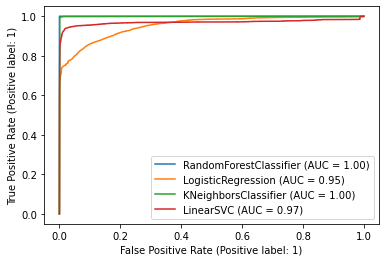

In [28]:
# plt.figure(figsize = [15,7])
ax = plt.gca()
for i in models:
    plot_roc_curve(i, bin_X_test, bin_y_test, ax=ax)

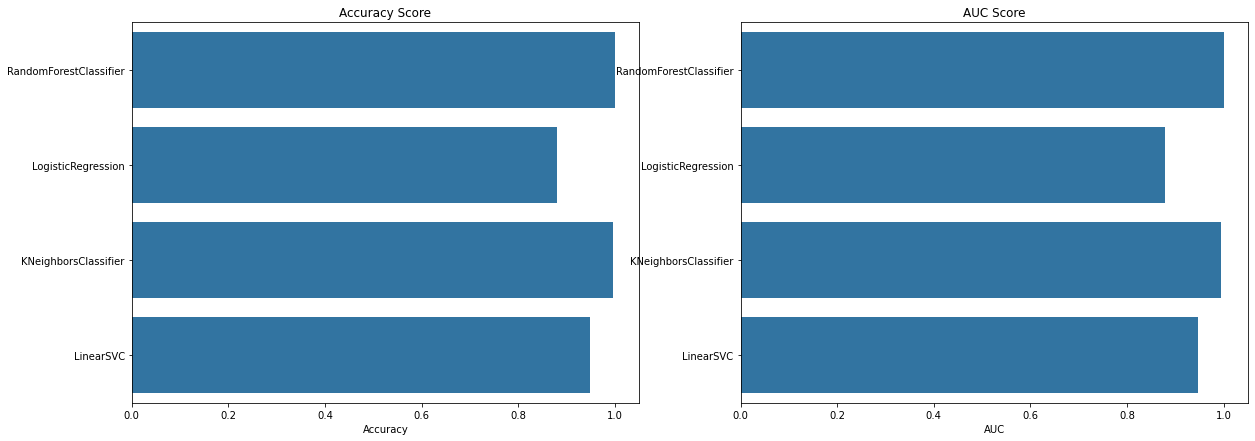

In [29]:
#  to plot accuracy and AUC
fig, ax = plt.subplots(1,2, figsize = [20,7])


base_color = sns.color_palette()[0]
sns.barplot(x = bin_class_acc, y = bin_model, linewidth=1.5, color = base_color, ax = ax[0])
ax[0].title.set_text("Accuracy Score")
ax[0].set_xlabel("Accuracy")

sns.barplot(x = bin_auc, y = bin_model, linewidth=1.5, color = base_color, ax = ax[1])
ax[1].title.set_text("AUC Score")
ax[1].set_xlabel("AUC");

### Multi_Classification of Attack

In [30]:
# splitting data
y = df_train['attack_map']

X_train, X_test, y_train, y_test = train_test_split(train_set, y, test_size=0.3)



The Metrics for RandomForestClassifier is: 

Accuracy: 0.999

Mean absolute error: 0.0019 
Mean squared error: 0.0064 
Root mean squared: 0.08 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20263
           1       1.00      1.00      1.00     13676
           2       1.00      1.00      1.00      3551
           3       1.00      0.56      0.71         9
           4       0.99      0.97      0.98       293

    accuracy                           1.00     37792
   macro avg       1.00      0.91      0.94     37792
weighted avg       1.00      1.00      1.00     37792

[[20258     1     0     0     4]
 [    1 13675     0     0     0]
 [    5     0  3546     0     0]
 [    3     0     1     5     0]
 [    8     0     0     0   285]]


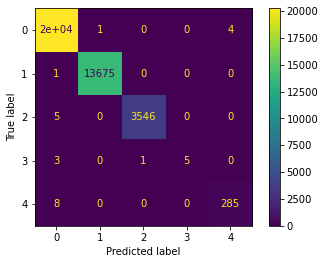



The Metrics for LogisticRegression is: 

Accuracy: 0.824

Mean absolute error: 0.2461 
Mean squared error: 0.4461 
Root mean squared: 0.6679 

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     20263
           1       0.76      0.96      0.85     13676
           2       0.71      0.06      0.11      3551
           3       0.00      0.00      0.00         9
           4       0.06      0.02      0.03       293

    accuracy                           0.82     37792
   macro avg       0.48      0.38      0.37     37792
weighted avg       0.82      0.82      0.79     37792

[[17801  2291    82     0    89]
 [  519 13149     0     0     8]
 [ 1442  1904   203     0     2]
 [    3     3     0     0     3]
 [  275    11     1     0     6]]


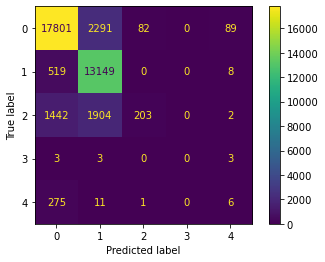



The Metrics for KNeighborsClassifier is: 

Accuracy: 0.991

Mean absolute error: 0.0146 
Mean squared error: 0.031 
Root mean squared: 0.1761 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     20263
           1       0.99      1.00      0.99     13676
           2       0.97      0.96      0.96      3551
           3       0.43      0.33      0.38         9
           4       0.95      0.94      0.94       293

    accuracy                           0.99     37792
   macro avg       0.87      0.84      0.85     37792
weighted avg       0.99      0.99      0.99     37792

[[20143    34    70     4    12]
 [   13 13622    41     0     0]
 [   28   110  3411     0     2]
 [    6     0     0     3     0]
 [   18     0     1     0   274]]


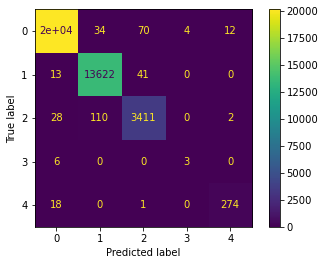



The Metrics for LinearSVC is: 

Accuracy: 0.952

Mean absolute error: 0.1381 
Mean squared error: 0.4602 
Root mean squared: 0.6784 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     20263
           1       0.99      0.97      0.98     13676
           2       0.95      0.91      0.93      3551
           3       1.00      0.11      0.20         9
           4       0.17      0.88      0.29       293

    accuracy                           0.95     37792
   macro avg       0.82      0.76      0.67     37792
weighted avg       0.98      0.95      0.96     37792

[[19210   138   162     0   753]
 [   83 13301     1     0   291]
 [   90    29  3224     0   208]
 [    8     0     0     1     0]
 [   35     0     0     0   258]]


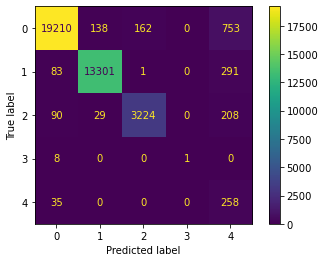

In [31]:
multi_class_acc = []
multi_mae = []
multi_mse = []
multi_rmse = []  
multi_sensitivity = []
multi_specificity = []

for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    
    confusion_matrix = metrics.confusion_matrix(y_test, model_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_ )
    acc = np.round(accuracy_score(model_pred, y_test),3)
    mae = np.round(mean_absolute_error(y_test, model_pred), 4)
    mse = np.round(mean_squared_error(y_test, model_pred), 4)
    rmse = np.round(np.sqrt(mse), 4)
    cm = metrics.confusion_matrix(y_test, model_pred)
    
    # Sensitivity, hit rate, recall, or true positive rate
    sen = cm[0,0]/(cm[0,0]+cm[0,1])
    multi_sensitivity.append(sen)
    
    #  Specificity or true negative rate
    spec = cm[1,1]/(cm[1,0]+cm[1,1])
    multi_specificity.append(spec)
    
    
    multi_class_acc.append(acc)
    multi_mae.append(mae)
    multi_mse.append(mse)
    multi_rmse.append(rmse)
    
    
    print("\n\nThe Metrics for {} is: \n\nAccuracy:".format(model_name), acc)
    print("\nMean absolute error: {} \nMean squared error: {} \nRoot mean squared: {} \n".format(mae, mse, rmse))
    print(classification_report(y_test, model_pred))
    print(metrics.confusion_matrix(y_test, model_pred))
    cm_display.plot()
    plt.show()
    
    print("====================================================")

In [32]:
multi_class_acc

[0.999, 0.824, 0.991, 0.952]

<AxesSubplot:>

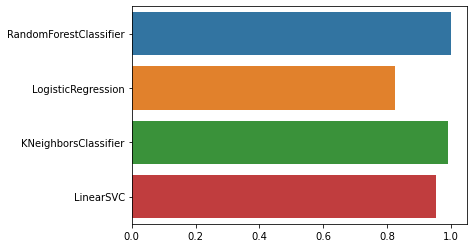

In [33]:
#ploting a barchart to show the accuracy scores of each model  

sns.barplot(x= multi_class_acc, y = bin_model , linewidth=1.5)

### Results

In [34]:
pd.DataFrame({'Model':bin_model, 'Multi_Accuracy':multi_class_acc,'Multi_MAE':multi_mae, 
              'Multi_MSE':multi_mse, 'Multi_RMSE':multi_rmse,})

pd.DataFrame(data=zip(bin_model, multi_class_acc, multi_mae, multi_mse, multi_rmse),
            columns = ["Model", "Multi_Accuracy", "Multi_MAE", "Multi_MSE", "Multi_RMSE"])

,Model,Multi_Accuracy,Multi_MAE,Multi_MSE,Multi_RMSE
0,RandomForestClassifier,0.999,0.0019,0.0064,0.0800
1,LogisticRegression,0.824,0.2461,0.4461,0.6679
2,KNeighborsClassifier,0.991,0.0146,0.0310,0.1761
3,LinearSVC,0.952,0.1381,0.4602,0.6784


In [35]:
pd.DataFrame({'Model':bin_model, "TPR": multi_sensitivity, "TNR": multi_specificity })

pd.DataFrame(data=zip(bin_model, multi_sensitivity, multi_sensitivity ),
            columns = ["Model","TPR", "TNR"])

,Model,TPR,TNR
0,RandomForestClassifier,0.999951,0.999951
1,LogisticRegression,0.885975,0.885975
2,KNeighborsClassifier,0.998315,0.998315
3,LinearSVC,0.992867,0.992867


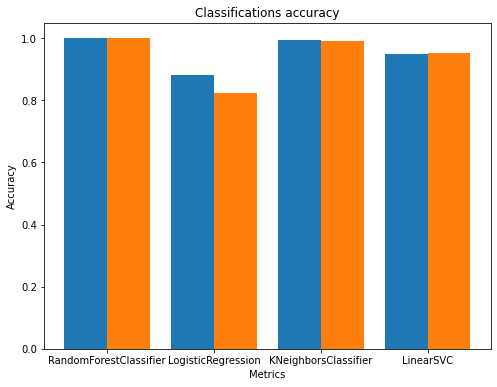

In [36]:
# plot the accuracy of both classifications
fig = plt.subplots(figsize =(8, 6))
  
X_axis = np.arange(len(bin_model))
plt.bar(X_axis - 0.2 , bin_class_acc ,  0.4,)
plt.bar(X_axis + 0.2 , multi_class_acc,  0.4,)
plt.xticks(X_axis, bin_model)
plt.xlabel("Metrics")
plt.ylabel("Accuracy")
plt.title("Classifications accuracy")
plt.show()

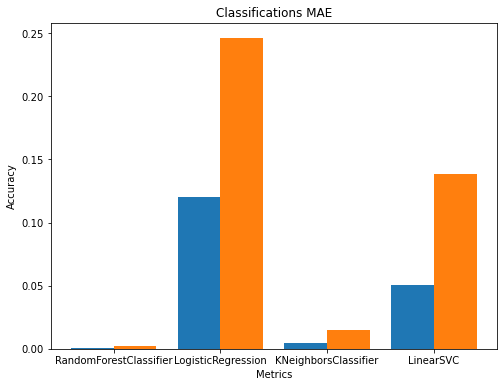

In [37]:
# plot the mean absolute error (mae) of both classifications
fig = plt.subplots(figsize =(8, 6))
  
X_axis = np.arange(len(bin_model))
plt.bar(X_axis - 0.2 , bin_mae ,  0.4,)
plt.bar(X_axis + 0.2 , multi_mae,  0.4,)
plt.xticks(X_axis, bin_model)
plt.xlabel("Metrics")
plt.ylabel("Accuracy")
plt.title("Classifications MAE")
plt.show()